# Exploratory Data Analysis on Filipino Family Income and Expenditure

For this dataset, the primary variable to be evaluated is the Household Income of Filipino families. Our hypothesis will mainly concern the other variables and how they perform as potential predictor variables.

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="#importing_data">Importing Data</a></li>
    <li><a href="#data_preprocessing">Data Preprocessing</a></li>
    <ul>
        <li><a href="#looking_for_null_values">Looking for null values</a></li>
        <li><a href="#handling_null_values">Handling null values</a></li>
        <ul>
            <li><a href="#household_head_occupation">Household Head Occupation</a></li>
            <li><a href="#household_head_class_of_worker">Household Head Class of Worker</a></li>
        </ul>
        <li><a href="#looking_for_duplicate_values">Looking for duplicate values</a></li>
    </ul>
    <li><a href="#exploratory_data_analysis">Exploratory Data Analysis (EDA)</a></li>
    <ul>
        <li><a href="#feature_engineering">Feature Engineering</a></li>
        <ul>
            <li><a href="#monthly_household_income">Monthly Household Income</a></li>
            <li><a href="#total_household_utility_items">Total Household Utility Items</a></li>
        </ul>
        <li><a href="#data_visualization">Data Visualization</a></li>
        <ul>
            <li><a href="#summary_statistics">Summary Statistics</a></li>
            <li><a href="#checking_for_outliers">Checking for Outliers</a></li>
            <li><a href="#continuous_numerical_variables">Continuous Numerical Variables</a></li>
            <li><a href="#categorical_variables">Categorical Variables</a></li>
        </ul>
    </ul>
    <li><a href="#conclusion">Conclusion</a></li>
</ul>
    
</div>
 
<hr>

<a id='importing_data'></a>
## Importing Data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set()
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 60)
df1 = pd.read_csv('Family Income and Expenditure.csv')
df1.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Type of Building/House,Type of Roof,Type of Walls,House Floor Area,House Age,Number of bedrooms,Tenure Status,Toilet Facilities,Electricity,Main Source of Water Supply,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,4,0,1,1,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,Single Family,3,0,1,2,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...",1,"Own use, faucet, community water system",1,1,1,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,Male,39,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment,Single Family,6,0,4,3,Single house,"Light material (cogon,nipa,anahaw)",Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...",0,"Shared, faucet, community water system",0,0,0,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,Male,52,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business,Single Family,3,0,3,2,Single house,"Light material (cogon,nipa,anahaw)",Light,30,15,1,Own or owner-like possession of house and lot,Closed pit,1,"Own use, faucet, community water system",1,0,0,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,16800,140,6996,2100,0,8472,1000,18887,75687,Male,65,Married,Elementary Graduate,With Job/Business,General managers/managing proprietors in trans...,Self-employed wihout any employee,Single Family,4,0,0,2,Single house,"Light material (cogon,nipa,an

In [3]:
display(df1.shape)
display(df1.info())
display(df1.describe())

(41544, 60)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
Total Household Income                           41544 non-null int64
Region                                           41544 non-null object
Total Food Expenditure                           41544 non-null int64
Main Source of Income                            41544 non-null object
Agricultural Household indicator                 41544 non-null int64
Bread and Cereals Expenditure                    41544 non-null int64
Total Rice Expenditure                           41544 non-null int64
Meat Expenditure                                 41544 non-null int64
Total Fish and  marine products Expenditure      41544 non-null int64
Fruit Expenditure                                41544 non-null int64
Vegetables Expenditure                           41544 non-null int64
Restaurant and hotels Expenditure                41544 non-null int64
Alcoholic Beverages Expenditure                  

None

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Age,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,House Floor Area,House Age,Number of bedrooms,Electricity,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
count,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,4.154400e+04,4.154400e+04,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,4.154400e+04,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000
mean,2.475556e+05,85099.158194,0.429858,25133.723642,18195.825005,10540.072574,10529.318337,2550.474990,5006.918568,15436.566075,1085.068121,2294.736183,4954.621076,3.837547e+04,2.092154e+04,7.160231e+03,11806.344454,4095.492057,7473.500481,12522.071635,5265.726001,1.381686e+04,5.437624e+04,51.381451,4.635182,0.410216,1.362579,1.272699,55.603360,20.125505,1.788008,0.890815,0.856875,0.435225,0.162141,0.394184,0.319806,0.129814,0.081215,0.060610,1.905738,0.315015,0.135038,0.013119,0.289885
std,2.868805e+05,51637.947682,0.676666,13466.482984,11727.224350,10497.727757,7812.201613,2969.752879,3300.175236,23705.195929,2174.431913,3998.977131,7496.500945,5.311168e+04,3.937152e+04,2.690200e+04,19351.213715,7298.822614,21219.170907,17547.027921,13279.593681,4.764378e+04,1.471428e+05,14.166081,2.280252,0.694390,1.408000,1.149152,55.023165,14.295452,1.105664,0.311875,0.646306,0.560125,0.389108,0.537025,0.478482,0.448673,0.346786,0.276732,1.558130,0.739698,0.354083,0.127171,0.558408
min,1.128500e+04,2947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.950000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,9.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.048950e+05,51017.250000,0.000000,16556.000000,11020.000000,3353.750000,5504.000000,1024.750000,2873.000000,1930.000000,0.000000,0.000000,1365.000000,1.308000e+04,6.000000e+03,3.000000e+02,2412.000000,564.000000,0.000000,3792.000000,0.000000,0.000000e+00,0.000000e+00,41.000000,3.000000,0.000000,0.000000,0.000000,25.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.640795e+05,72985.500000,0.000000,23324.000000,16620.000000,7332.500000,8695.000000,1820.000000,4314.000000,7314.000000,270.000000,300.000000,2740.000000,2.299200e+04,1.080000e+04,1.125000e+03,6036.000000,1506.000000,880.000000,6804.000000,1

<a id='data_preprocessing'></a>
## Data Preprocessing

<a id='looking_for_null_values'></a>
### Looking for null values

In [4]:
df1.isnull().sum()

Total Household Income                              0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure  

<a id='handling_null_values'></a>
### Handling null values

<a id='household_head_occupation'></a>
#### Household Head Occupation

Since there are 7,536 rows with null values and they are a sizable share of the 41,544 data points, imputing the row values as being "Unknown" seems better than dropping them altogether.

In [5]:
df1['Household Head Occupation'] = df1['Household Head Occupation'].fillna('Unknown')

<a id='household_head_class_of_worker'></a>
#### Household Head Class of Worker

The same approach for the previous column is also done on the "Household Head Class of Worker" column

In [6]:
df1['Household Head Class of Worker'] = df1['Household Head Class of Worker'].fillna('Unknown')

<a id='looking_for_duplicate_values'></a>
### Looking for duplicate values

In [7]:
df1.duplicated().sum()

0

<a id='exploratory_data_analysis'></a>
## Exploratory Data Analysis (EDA)

<a id='feature_engineering'></a>
### Feature Engineering

<a id='monthly_household_income'></a>
#### Monthly Household Income

According to the Dataset Creator, all metrics are in PHP (Philippine Peso) and are recorded annually.
<br>(from https://www.kaggle.com/grosvenpaul/family-income-and-expenditure/discussion/42805)
<br>For the "Total Household Income" column which is represented annually, replacing it with a downscaled "Monthly Household Income" column can be helpful to better understand the values on a smaller time period.

In [8]:
df1['Total Household Income'] /= 12
df1.rename(columns = {'Total Household Income': 'Monthly Household Income'}, inplace = True)

<a id='total_household_utility_items'></a>
#### Total Household Utility Items

The last 13 columns represent quantitative variables on the number of utility items a certain household owns. Creating an aggregate column for the said variables might be useful as some households may just have priority on different items.

In [9]:
df1['Total Household Utility Items'] = (df1['Number of Television'] + df1['Number of CD/VCD/DVD'] 
                                        + df1['Number of Component/Stereo set'] + df1['Number of Refrigerator/Freezer']
                                        + df1['Number of Washing Machine'] + df1['Number of Airconditioner']
                                        + df1['Number of Car, Jeep, Van'] + df1['Number of Landline/wireless telephones']
                                        + df1['Number of Cellular phone'] + df1['Number of Personal Computer']
                                        + df1['Number of Stove with Oven/Gas Range'] + df1['Number of Motorized Banca']
                                        + df1['Number of Motorcycle/Tricycle'])

<a id='data_visualization'></a>
### Data Visualization

<a id='summary_statistics'></a>
#### Summary Statistics

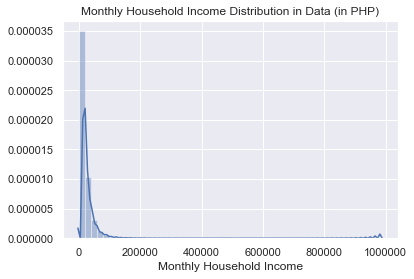

In [10]:
sns.distplot(df1['Monthly Household Income']);
plt.title('Monthly Household Income Distribution in Data (in PHP)')
plt.show()

The Household Income distribution seems to be very skewed to the right with outliers present until around 1,000,000 PHP/month. Since some incomes tend to have very large values and are above other values in terms of magnitude, applying the logarithm function to the values should give a better distribution visualization. 

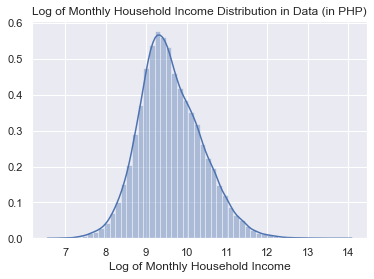

In [11]:
sns.distplot(np.log(df1['Monthly Household Income']));
plt.title('Log of Monthly Household Income Distribution in Data (in PHP)')
plt.xlabel('Log of Monthly Household Income')
plt.show()

<a id='checking_for_outliers'></a>
#### Checking for Outliers

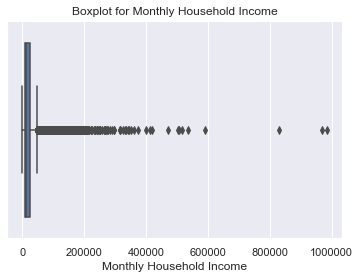

In [12]:
sns.boxplot(df1['Monthly Household Income'])
plt.title('Boxplot for Monthly Household Income')
plt.show()

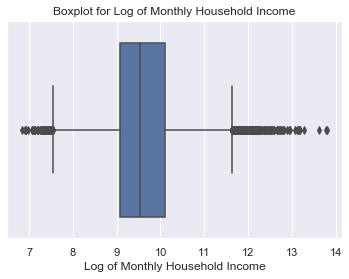

In [13]:
sns.boxplot(np.log(df1['Monthly Household Income']))
plt.title('Boxplot for Log of Monthly Household Income')
plt.xlabel('Log of Monthly Household Income')
plt.show()

As seen in both the normal and logarithmic boxplots for Monthly Household Income, there are many present outliers in the dataset. However, removing or dropping them might be detrimental to our predictive model as they might be valuable in providing key insights. 

<a id='continuous_numerical_variables'></a>
#### Continuous Numerical Variables

Before assessing the continuous numerical variables present in the dataset, the "Agricultural Household indicator" and "Electricity" columns will be dropped as they are int64 categorical variables.

In [14]:
df1_cn = df1.drop('Agricultural Household indicator', axis=1).drop('Electricity', axis=1)
df1_cn.head()

,Monthly Household Income,Region,Total Food Expenditure,Main Source of Income,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Total Number of Family members,Members with age less than 5 year old,Members with age 5 - 17 years old,Total number of family members employed,Type of Building/House,Type of Roof,Type of Walls,House Floor Area,House Age,Number of bedrooms,Tenure Status,Toilet Facilities,Main Source of Water Supply,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,Total Household Utility Items
0,40027.666667,CAR,117848,Wage/Salaries,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,4,0,1,1,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...","Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1,8
1,16519.583333,CAR,67766,Wage/Salaries,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,27000,3520,12900,5700,29300,9150,1500,0,0,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,Single Family,3,0,1,2,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,42,15,2,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...","Own use, faucet, community water system",1,1,1,0,1,0,0,0,3,1,0,0,2,10
2,6898.750000,CAR,61609,Wage/Salaries,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,Male,39,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment,Single Family,6,0,4,3,Single house,"Light material (cogon,nipa,anahaw)",Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...","Shared, faucet, community water system",0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8965.750000,CAR,78189,Wage/Salaries,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,Male,52,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business,Single Family,3,0,3,2,Single house,"Light material (cogon,nipa,anahaw)",Light,30,15,1,Own or owner-like possession of house and lot,Closed pit,"Own use, faucet, community water system",1,0,0,0,0,0,0,0,1,0,0,0,0,2
4,15776.833333,CAR,94625,Wage/Salaries,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,16800,140,6996,2100,0,8472,1000,18887,75687,Male,65,Married,Elementary Graduate,With Job/Business,General managers/managing proprietors in trans...,Self-employed wihout any employee,Single Family,4,0,0,2,Single house,"Light material (cogon,

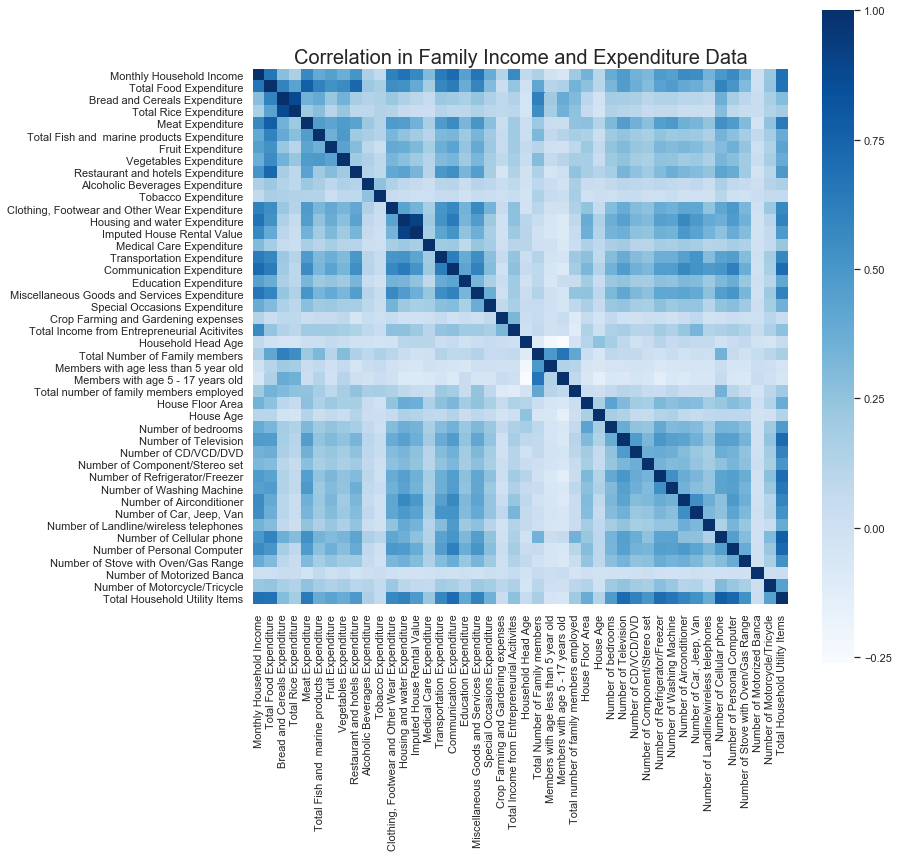

In [15]:
corr = df1_cn.corr()
plt.figure(figsize = (12, 12))
sns.heatmap(corr, square = True, cmap = "Blues")
plt.title('Correlation in Family Income and Expenditure Data', fontsize = 20)
plt.show()

The above correlation matrix contains too many values to be properly assessed. Creating submatrices for different groups of variables can give us a better visual of the correlations to be focused on.

In [16]:
df2 = pd.concat([df1.iloc[:,0], df1.filter(like = 'Expenditure')], axis = 1)
df2.head()

,Monthly Household Income,Total Food Expenditure,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure
0,40027.666667,117848,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,3457,4776,2880,36200,34056,7200
1,16519.583333,67766,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,3520,12900,5700,29300,9150,1500
2,6898.750000,61609,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,70,324,420,425,6450,500
3,8965.750000,78189,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,60,6840,660,300,3762,500
4,15776.833333,94625,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,140,6996,2100,0,8472,1000


The above dataframe contains the Expenditure variables along with our primary variable, Monthly Household Income.

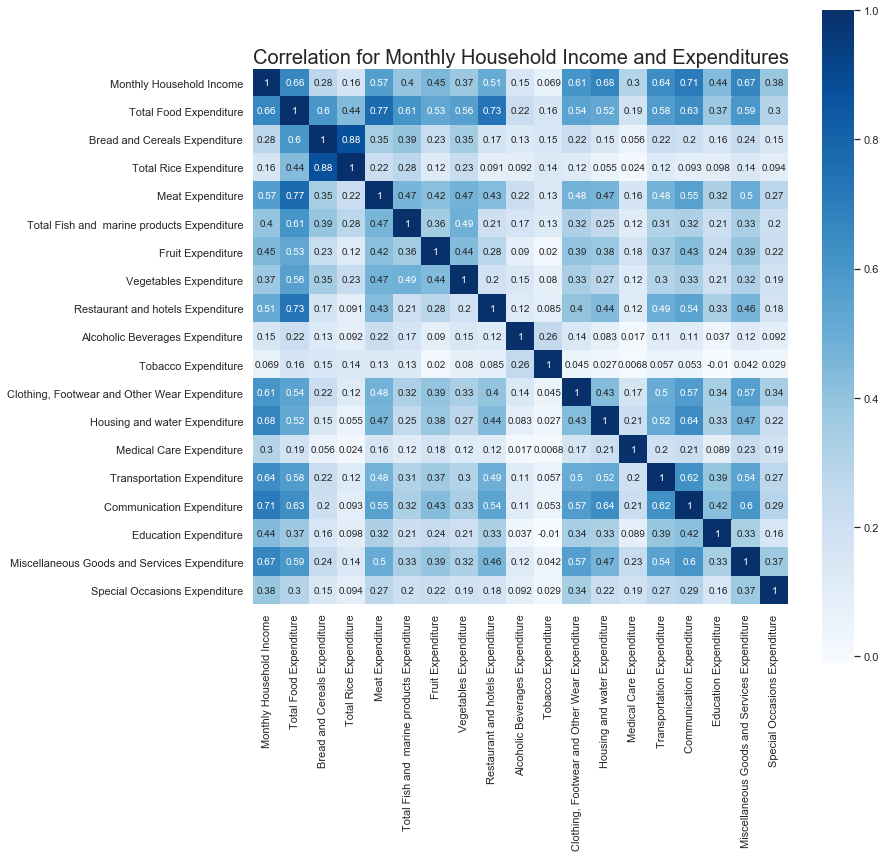

In [17]:
corr2 = df2.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr2, annot = True, square = True, cmap = "Blues")
plt.title('Correlation for Monthly Household Income and Expenditures', fontsize = 20)
plt.show()

The above correlation submatrix for Monthly Household Income and Expenditures gives a better visualization of the correlation values between the variables. Getting the top 10 correlation values of potential predictor variables relative to the Household Income variable will be very helpful in our assessment.

In [18]:
df2_top10 = pd.DataFrame.nlargest(corr2, n = 10, columns = 'Monthly Household Income')
df2_top10 = df2_top10[['Monthly Household Income']]
df2_top10

,Monthly Household Income
Monthly Household Income,1.000000
Communication Expenditure,0.710140
Housing and water Expenditure,0.676186
Miscellaneous Goods and Services Expenditure,0.666288
Total Food Expenditure,0.663660
Transportation Expenditure,0.639939
"Clothing, Footwear and Other Wear Expenditure",0.605992
Meat Expenditure,0.567142
Restaurant and hotels Expenditure,0.510017
Fruit Expenditure,0.448943


For this dataset, a minimum absolute correlation value of ±0.6 will be the cutoff for a variable to be considered as a predictor variable since they have a moderately strong enough relationship with out primary variable. There are no negative correlation values with respect to the Monthly Household Income variable so there is no need to get largest absolute values for the variables. The nlargest function should suffice.

In [19]:
predictor_variables = []
for index, row in df2_top10.iterrows():
    if row['Monthly Household Income'] >= 0.6 and index != 'Monthly Household Income':
        predictor_variables.append(index)
predictor_variables

['Communication Expenditure',
 'Housing and water Expenditure',
 'Miscellaneous Goods and Services Expenditure',
 'Total Food Expenditure',
 'Transportation Expenditure',
 'Clothing, Footwear and Other Wear Expenditure']

The above code snippet filters the variables through the 0.6 cutoff condition to the list containing the predictor variables.

In [20]:
df3 = pd.concat([df1.iloc[:,0], df1.iloc[:,47:]], axis = 1)
df3.head()

,Monthly Household Income,Number of Television,Number of CD/VCD/DVD,Number of Component/Stereo set,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,Total Household Utility Items
0,40027.666667,1,1,0,1,1,0,0,0,2,1,0,0,1,8
1,16519.583333,1,1,1,0,1,0,0,0,3,1,0,0,2,10
2,6898.750000,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8965.750000,1,0,0,0,0,0,0,0,1,0,0,0,0,2
4,15776.833333,1,0,0,1,0,0,0,0,3,0,0,0,1,6


The above dataframe contains the Household Utility Item Variables along with our primary variable, Monthly Household Income.

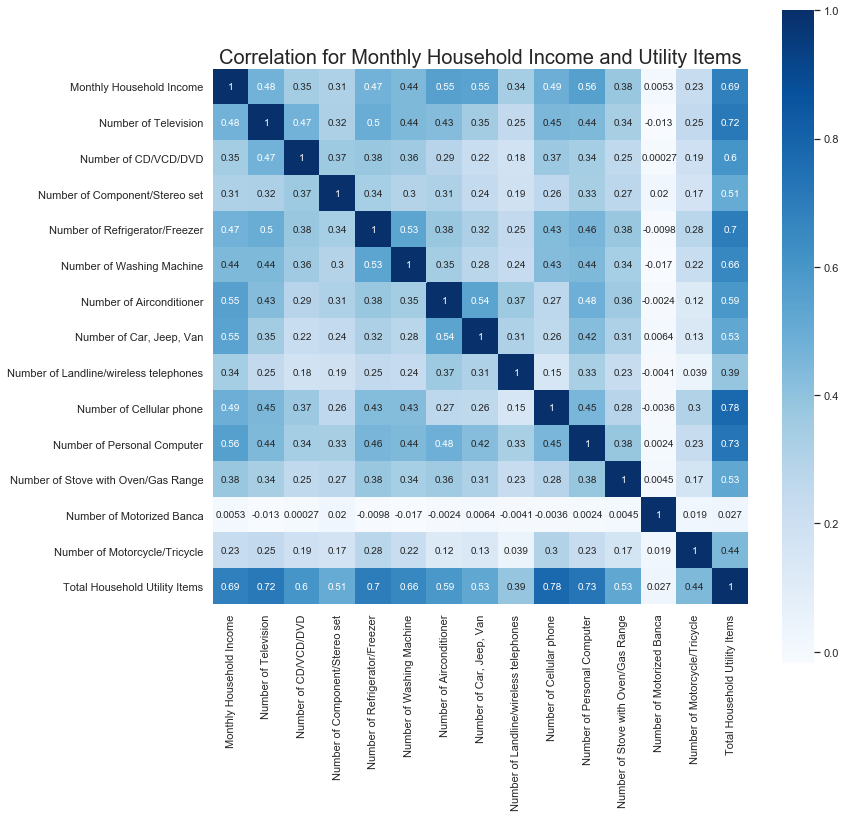

In [21]:
corr3 = df3.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr3, annot = True, square = True, cmap = "Blues")
plt.title('Correlation for Monthly Household Income and Utility Items', fontsize = 20)
plt.show()

Again, a smaller correlation submatrix is done for better visualization

In [22]:
df3_top10 = pd.DataFrame.nlargest(corr3, n = 10, columns = 'Monthly Household Income')
df3_top10 = df3_top10[['Monthly Household Income']]
df3_top10

,Monthly Household Income
Monthly Household Income,1.000000
Total Household Utility Items,0.689568
Number of Personal Computer,0.557561
Number of Airconditioner,0.551994
"Number of Car, Jeep, Van",0.546663
Number of Cellular phone,0.488106
Number of Television,0.475170
Number of Refrigerator/Freezer,0.473454
Number of Washing Machine,0.443680
Number of Stove with Oven/Gas Range,0.380141


Again, there are no negative correlation values with respect to the Monthly Household Income variable so the nlargest function should suffice. 

In [23]:
for index, row in df3_top10.iterrows():
    if row['Monthly Household Income'] >= 0.6 and index != 'Monthly Household Income':
        predictor_variables.append(index)
predictor_variables

['Communication Expenditure',
 'Housing and water Expenditure',
 'Miscellaneous Goods and Services Expenditure',
 'Total Food Expenditure',
 'Transportation Expenditure',
 'Clothing, Footwear and Other Wear Expenditure',
 'Total Household Utility Items']

The list of predictor variables is then updated. The created "Total Household Utility Items" variable as an aggregate substitute for the other utility item variables turns out to be valuable as it has a fairly high correlation value with the primary variable.

In [24]:
df1_top20 = pd.DataFrame.abs(pd.DataFrame.nlargest(corr, n = 20, columns = 'Monthly Household Income'))
df1_top20 = df1_top20[['Monthly Household Income']]
df1_top20

,Monthly Household Income
Monthly Household Income,1.000000
Communication Expenditure,0.710140
Total Household Utility Items,0.689568
Housing and water Expenditure,0.676186
Miscellaneous Goods and Services Expenditure,0.666288
Total Food Expenditure,0.663660
Transportation Expenditure,0.639939
"Clothing, Footwear and Other Wear Expenditure",0.605992
Imputed House Rental Value,0.574091
Meat Expenditure,0.567142


The above dataframe is created to check if there are other numerical variables that can pass the ±0.6 absolute correlation cutoff. It looks like there are no more additional predictor variables to be found. 

In [25]:
df4 = pd.concat([df1[['Monthly Household Income']], df1.filter(items = predictor_variables)], axis = 1)
df4.head()

,Monthly Household Income,Communication Expenditure,Housing and water Expenditure,Miscellaneous Goods and Services Expenditure,Total Food Expenditure,Transportation Expenditure,"Clothing, Footwear and Other Wear Expenditure",Total Household Utility Items
0,40027.666667,2880,63636,34056,117848,4776,4607,8
1,16519.583333,5700,41370,9150,67766,12900,8230,10
2,6898.750000,420,14340,6450,61609,324,2735,0
3,8965.750000,660,16638,3762,78189,6840,1390,2
4,15776.833333,2100,31122,8472,94625,6996,4620,6


The above data frame contains the primary variable along with the numerical predictor variables that were established.
Scatter plots between the predictor variables and the primary variable can be seen below.

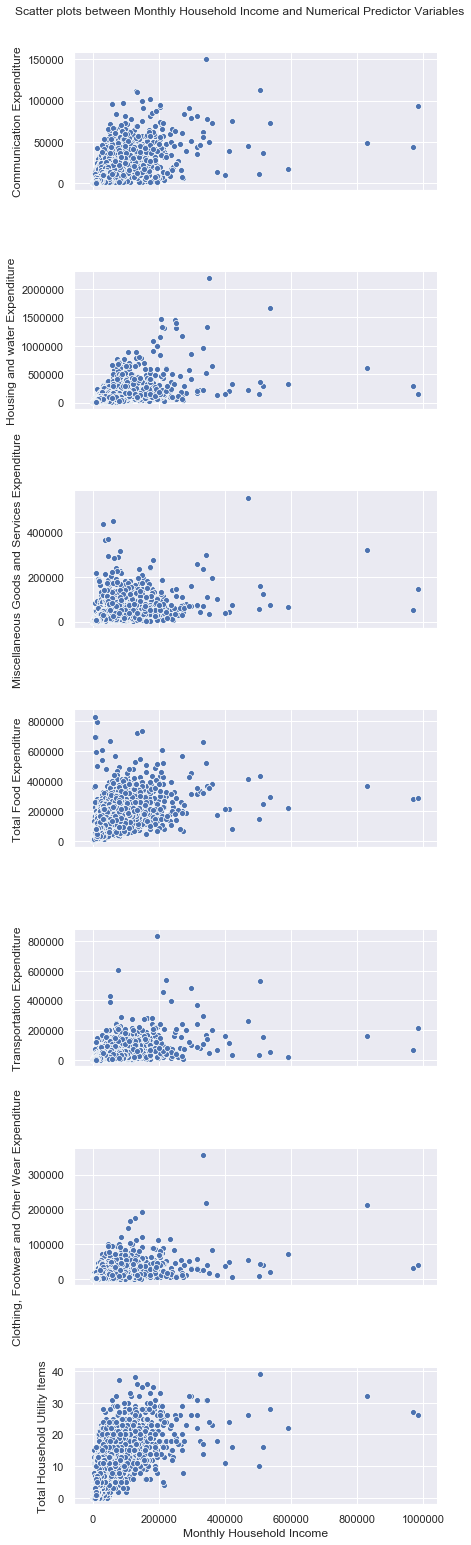

In [26]:
sns.pairplot(df4, height = 3.0, aspect = 2, x_vars = ['Monthly Household Income'], y_vars = predictor_variables)
plt.suptitle('Scatter plots between Monthly Household Income and Numerical Predictor Variables', y=1.02)
plt.show()

In [27]:
for i in df4.columns:
    pearson_coef, p_value = stats.pearsonr(df4['Monthly Household Income'], df4[i])
    print('The Pearson Correlation Coefficient between Monthly Household Income and ' + i)
    print(' is', pearson_coef, ' with a P-value of P = ', p_value)
    print(100*'-')

The Pearson Correlation Coefficient between Monthly Household Income and Monthly Household Income
 is 1.0  with a P-value of P =  0.0
----------------------------------------------------------------------------------------------------
The Pearson Correlation Coefficient between Monthly Household Income and Communication Expenditure
 is 0.7101401370187813  with a P-value of P =  0.0
----------------------------------------------------------------------------------------------------
The Pearson Correlation Coefficient between Monthly Household Income and Housing and water Expenditure
 is 0.6761858492598934  with a P-value of P =  0.0
----------------------------------------------------------------------------------------------------
The Pearson Correlation Coefficient between Monthly Household Income and Miscellaneous Goods and Services Expenditure
 is 0.6662883885941249  with a P-value of P =  0.0
------------------------------------------------------------------------------------------

The above code snippet checks for both the correlation coefficients and p-values between the continuous numerical predictor variables and the primary variables via the scipy library. As seen from their respective p-values, their respective correlations are statistically significant. 

<a id='categorical_variables'></a>
#### Categorical Variables

To properly assess categorical variables, the below dataframe is created. It includes the primary variable, all int64 categorical variables, and all object categorical variables.

In [28]:
df5 = pd.DataFrame.select_dtypes(df1, include = object)
dflist = [df1[['Monthly Household Income']], df1[['Agricultural Household indicator', 'Electricity']], df5]
df5 = pd.concat(dflist, axis = 1)
df5.head()

,Monthly Household Income,Agricultural Household indicator,Electricity,Region,Main Source of Income,Household Head Sex,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Type of Household,Type of Building/House,Type of Roof,Type of Walls,Tenure Status,Toilet Facilities,Main Source of Water Supply
0,40027.666667,0,1,CAR,Wage/Salaries,Female,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...","Own use, faucet, community water system"
1,16519.583333,0,1,CAR,Wage/Salaries,Male,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,Single Family,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...","Own use, faucet, community water system"
2,6898.750000,1,0,CAR,Wage/Salaries,Male,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment,Single Family,Single house,"Light material (cogon,nipa,anahaw)",Light,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...","Shared, faucet, community water system"
3,8965.750000,0,1,CAR,Wage/Salaries,Male,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business,Single Family,Single house,"Light material (cogon,nipa,anahaw)",Light,Own or owner-like possession of house and lot,Closed pit,"Own use, faucet, community water system"
4,15776.833333,0,1,CAR,Wage/Salaries,Male,Married,Elementary Graduate,With Job/Business,General managers/managing proprietors in trans...,Self-employed wihout any employee,Single Family,Single house,"Light material (cogon,nipa,anahaw)",Quite Strong,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...","Own use, faucet, community water system"


In [29]:
df5.columns

Index(['Monthly Household Income', 'Agricultural Household indicator',
       'Electricity', 'Region', 'Main Source of Income', 'Household Head Sex',
       'Household Head Marital Status',
       'Household Head Highest Grade Completed',
       'Household Head Job or Business Indicator', 'Household Head Occupation',
       'Household Head Class of Worker', 'Type of Household',
       'Type of Building/House', 'Type of Roof', 'Type of Walls',
       'Tenure Status', 'Toilet Facilities', 'Main Source of Water Supply'],
      dtype='object')

The two int64 categorical variables are first to be assessed. Box plots between the groups of the two variables can be plotted to see if there are significant differences.

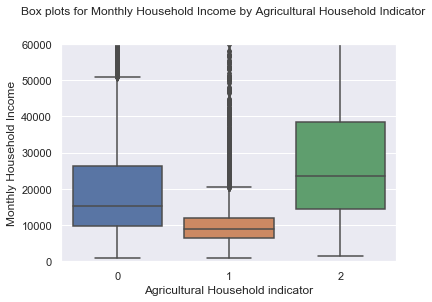

In [30]:
df5_ahi = df5[['Agricultural Household indicator', 'Monthly Household Income']]
test1 = sns.boxplot(x='Agricultural Household indicator', y='Monthly Household Income', data = df5_ahi)
test1.set_ylim(0,60000)
plt.suptitle('Box plots for Monthly Household Income by Agricultural Household Indicator', y = 1.01)
plt.show()
# 0, 1, 2 = ?

The Agricultural Household indicator variable has groups with relatively little overlap making it a decent predictor variable. <br>However, it has three values as indicators (0, 1, 2) as opposed to the binary convention (0, 1) making their respective labels unclear and they should be clarified for transparency. (The dataset provider did not state the variable labels)

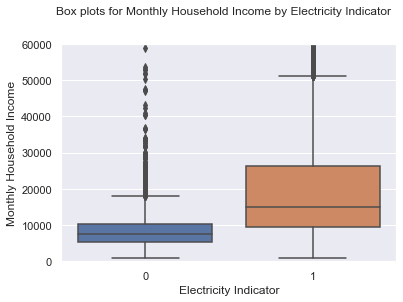

In [31]:
df5_e = df5[['Electricity', 'Monthly Household Income']]
test2 = sns.boxplot(x='Electricity', y='Monthly Household Income', data = df5_e)
test2.set_ylim(0,60000)
plt.suptitle('Box plots for Monthly Household Income by Electricity Indicator', y = 1.01)
plt.xlabel('Electricity Indicator')
plt.show()
# 0 - electricity is not present, 1 - electricity is present

The Electricity indicator variable also has little overlap making it a good predictor variable.

The other object data type categorical variables are next to be assessed.

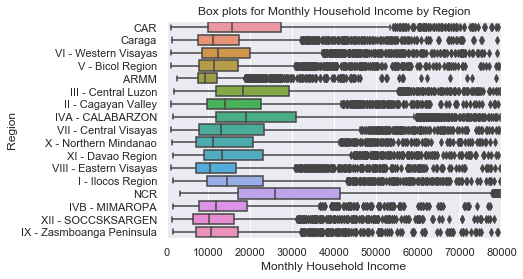

In [32]:
df5_r = df5[['Region', 'Monthly Household Income']]
test3 = sns.boxplot(y ='Region', x = 'Monthly Household Income', data = df5_r)
test3.set_xlim(0,80000)
plt.title('Box plots for Monthly Household Income by Region')
plt.show()

The Box plots above have many instances of overlap with each other so the categorical variable seems to not fit as a good predictor.

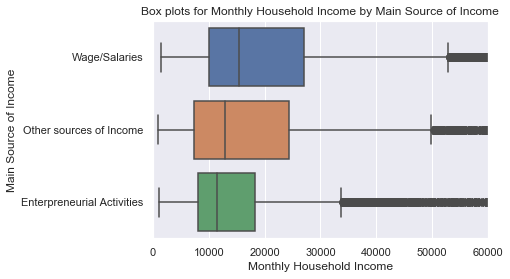

In [33]:
df5_msi = df5[['Main Source of Income', 'Monthly Household Income']]
test4 = sns.boxplot(y ='Main Source of Income', x = 'Monthly Household Income', data = df5_msi)
test4.set_xlim(0,60000)
plt.title('Box plots for Monthly Household Income by Main Source of Income')
plt.show()

The Box plots above have significant overlap with each other so the categorical variable seems to not fit as a good predictor.

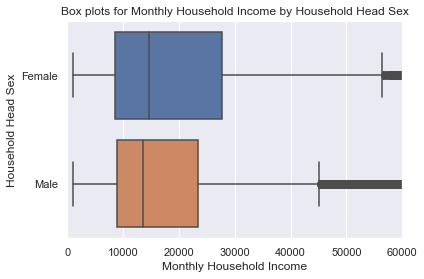

In [34]:
df5_hhs = df5[['Household Head Sex', 'Monthly Household Income']]
test5 = sns.boxplot(y ='Household Head Sex', x = 'Monthly Household Income', data = df5_hhs)
test5.set_xlim(0,60000)
plt.title('Box plots for Monthly Household Income by Household Head Sex')
plt.show()

The Box plots above have significant overlap with each other so the categorical variable seems to not fit as a good predictor.

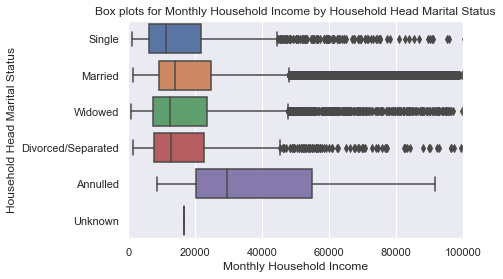

In [35]:
df5_hhm = df5[['Household Head Marital Status', 'Monthly Household Income']]
test6 = sns.boxplot(y ='Household Head Marital Status', x = 'Monthly Household Income', data = df5_hhm)
test6.set_xlim(0,100000)
plt.title('Box plots for Monthly Household Income by Household Head Marital Status')
plt.show()

The Box plots above, apart from the 'Annulled' group, have significant overlap with each other so the categorical variable seems to be not as good of a predictor.

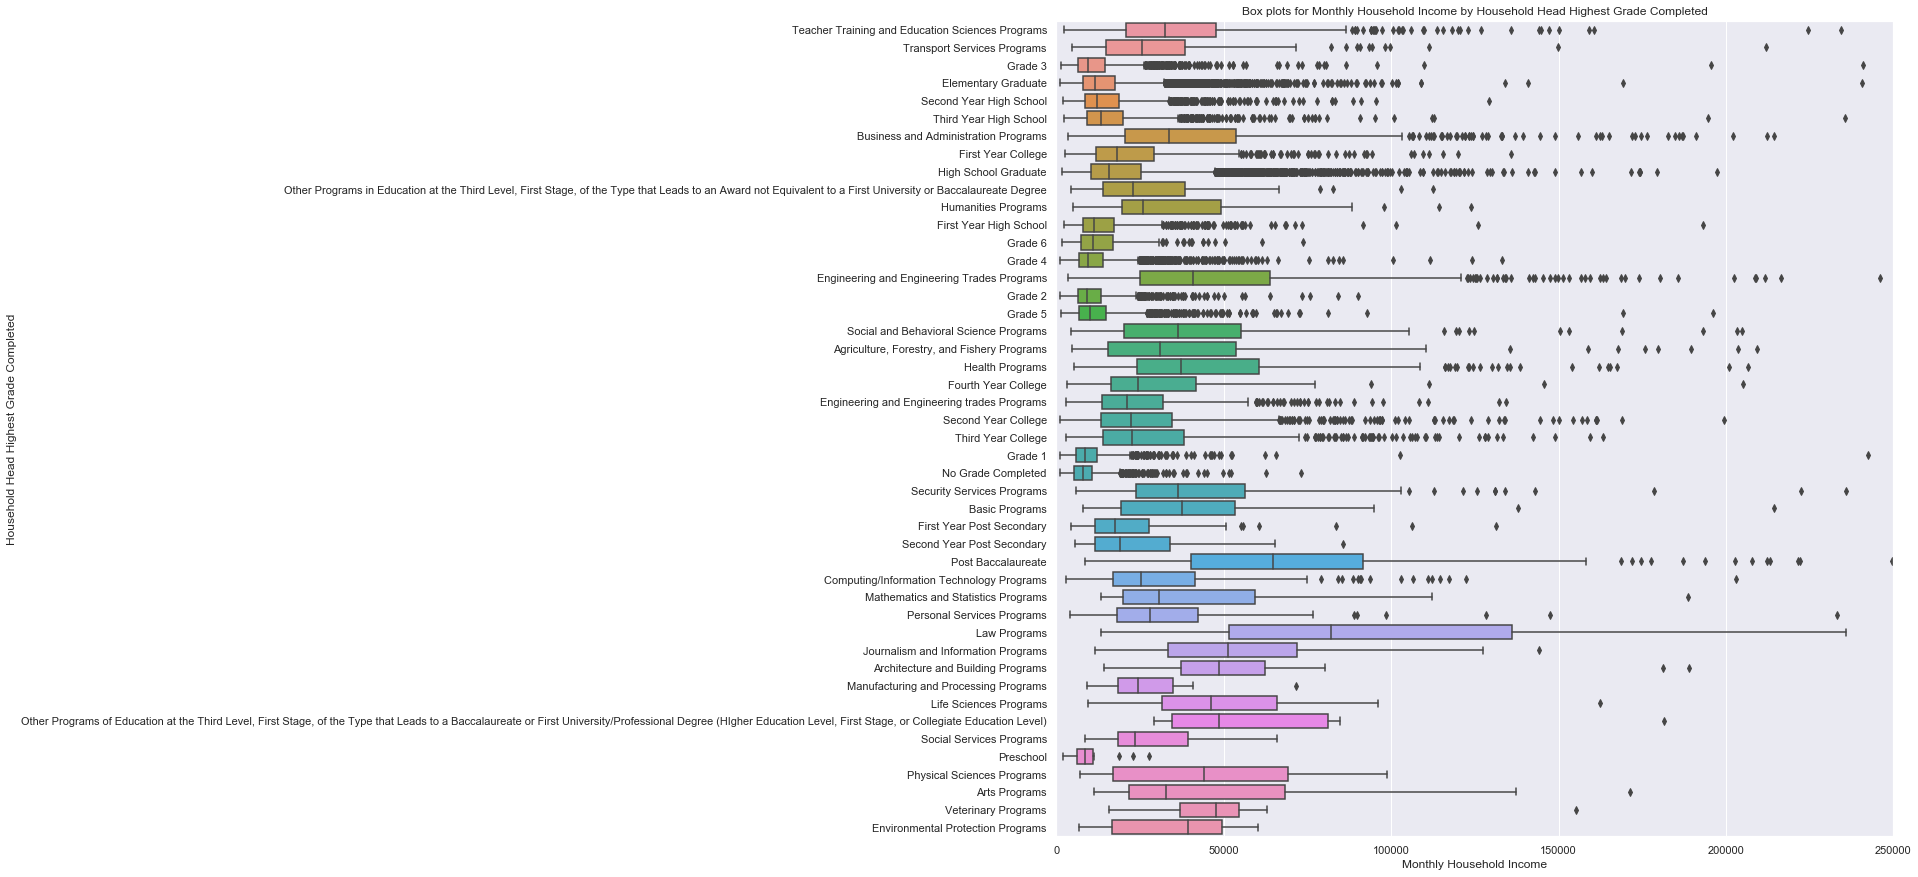

In [36]:
df5_hhg = df5[['Household Head Highest Grade Completed', 'Monthly Household Income']]
plt.figure(figsize = (15, 15))
test7 = sns.boxplot(y = 'Household Head Highest Grade Completed', x = 'Monthly Household Income', data = df5_hhg)
test7.set_xlim(0,250000)
plt.title('Box plots for Monthly Household Income by Household Head Highest Grade Completed')
plt.show()

The above box plot visualization contains too many values for the presented categorical variable, Household Head Highest Grade Completed. Categorizing them into smaller subgroups can improve the visualization.

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vi

Text(0, 0.5, 'Household Head Completed Grade Group')

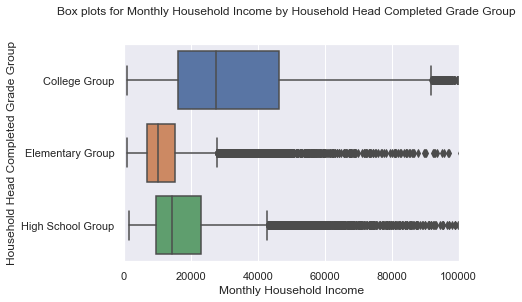

In [37]:
gradelist = list(df5_hhg['Household Head Highest Grade Completed'].unique())
elementary = [x for x in gradelist if 'Grade' in x or x in ['Elementary Graduate', 'Preschool']] # elementary graduate being the highest possible
highschool = [x for x in gradelist if 'High School' in x] # high school graduate being the highest possible
college = [x for x in gradelist if 'College' in x or 'Post Secondary' in x or 'Programs' in x or x == 'Post Baccalaureate'] # first year college being the least possible
for i in elementary:
    df5_hhg['Household Head Highest Grade Completed'] = df5_hhg['Household Head Highest Grade Completed'].replace(to_replace = i, value = 'Elementary Group')
for i in highschool:
    df5_hhg['Household Head Highest Grade Completed'] = df5_hhg['Household Head Highest Grade Completed'].replace(to_replace = i, value = 'High School Group')
for i in college:
    df5_hhg['Household Head Highest Grade Completed'] = df5_hhg['Household Head Highest Grade Completed'].replace(to_replace = i, value = 'College Group')
test7_1 = sns.boxplot(y ='Household Head Highest Grade Completed', x = 'Monthly Household Income', data = df5_hhg)
test7_1.set_xlim(0,100000)
plt.suptitle('Box plots for Monthly Household Income by Household Head Completed Grade Group', y = 1.01)
plt.ylabel('Household Head Completed Grade Group')

The above code snippet categorizes the desired categorical variables into three subgroups: 
<br>1.) Elementary - where Elementary Graduate is the highest possible grade 
<br>2.) High School - where High School Graduate is the highest possible grade 
<br>3.) College - where First Year College is the lowest possible grade
<br>The resulting box plot visualization from the created subgroups looks more appealing relative to the previous one. The Box plots shown have little overlap and are distinct enough to be classified as a good predictor.

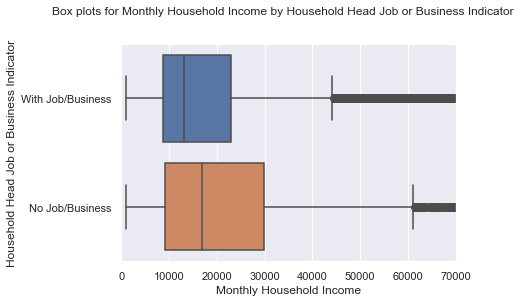

In [38]:
df5_hhj = df5[['Household Head Job or Business Indicator', 'Monthly Household Income']]
test8 = sns.boxplot(y ='Household Head Job or Business Indicator', x = 'Monthly Household Income', data = df5_hhj)
test8.set_xlim(0,70000)
plt.suptitle('Box plots for Monthly Household Income by Household Head Job or Business Indicator', y = 1.01)
plt.show()

The Box plots above have significant overlap with each other so the categorical variable seems to not fit as a good predictor.

In [39]:
# box plot attempt:
# df5_hho = df5[['Household Head Occupation', 'Monthly Household Income']]
# test9 = sns.boxplot(y ='Household Head Occupation', x = 'Monthly Household Income', data = df5_hho)
# test9.set_xlim(0,200000)

df5_hho = df5[['Household Head Occupation', 'Monthly Household Income']]
df5_hhogroup = pd.Series.to_frame(df5_hho.groupby('Household Head Occupation')['Monthly Household Income'].mean())
display(df5_hhogroup.head())
display(df5_hhogroup.describe())

,Monthly Household Income
Household Head Occupation,
Accountants and auditors,55567.085526
Accounting and bookkeeping clerks,32608.615385
Administrative secretaries and related associate professionals,45269.522436
Advertising and public relations managers,40225.000000
Agricultural or industrial machinery mechanics and fitters,26298.537037


,Monthly Household Income
count,379.000000
mean,32680.584827
std,22786.286990
min,5921.833333
25%,16712.091777
50%,24651.674603
75%,42365.256944
max,174160.916667


The above code snippet contains a comment block that shows the box plot visualization for the categorical variable, Household Head Occupation. However, the variable has too many unique values and grouping them may not be ideal as they can have different similarities in different aspects. The code instead creates a dataframe which assigns the mean Monthly Household Income for each unique value of Household Head Occupation. The describe function shows a relatively large standard deviation value of ~22,786.29 PHP while having a minimum value of ~5,921.83 PHP and a maximum value of ~174,160.92 PHP so it is reasonable to suggest that the variable unique values are more or less different with each other. Intuitively, it also makes sense that occupation is a good predictor variable but it would be better to find a good visualization to verify. The said categorical variable is recommended for further study.

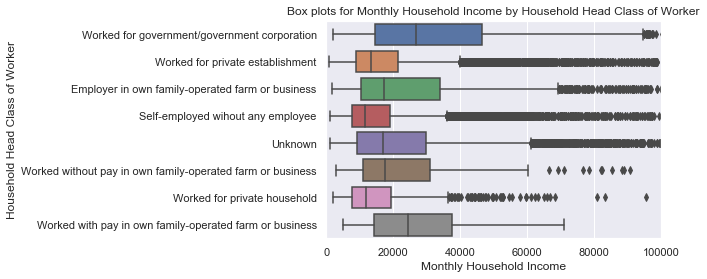

In [40]:
df5_hhc = df5[['Household Head Class of Worker', 'Monthly Household Income']]
test10 = sns.boxplot(y ='Household Head Class of Worker', x = 'Monthly Household Income', data = df5_hhc)
test10.set_xlim(0,100000)
plt.title('Box plots for Monthly Household Income by Household Head Class of Worker')
plt.show()

The Box plots above have many instances of overlap with each other so the categorical variable seems to not fit as a good predictor.

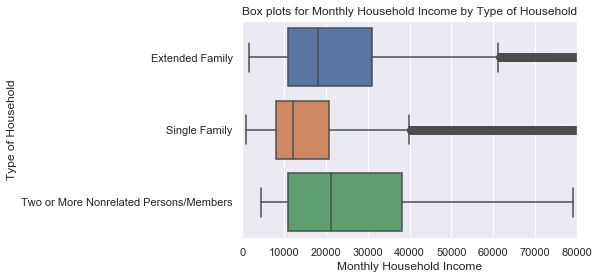

In [41]:
df5_th = df5[['Type of Household', 'Monthly Household Income']]
test11 = sns.boxplot(y ='Type of Household', x = 'Monthly Household Income', data = df5_th)
test11.set_xlim(0,80000)
plt.title('Box plots for Monthly Household Income by Type of Household')
plt.show()

The Box plots above have significant overlap with each other so the categorical variable seems to not fit as a good predictor.

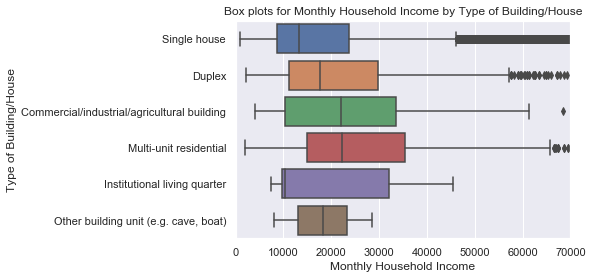

In [42]:
df5_tb = df5[['Type of Building/House', 'Monthly Household Income']]
test12 = sns.boxplot(y ='Type of Building/House', x = 'Monthly Household Income', data = df5_tb)
test12.set_xlim(0,70000)
plt.title('Box plots for Monthly Household Income by Type of Building/House')
plt.show()

The Box plots above have multiple instances of significant overlap with each other so the categorical variable seems to not fit as a good predictor.

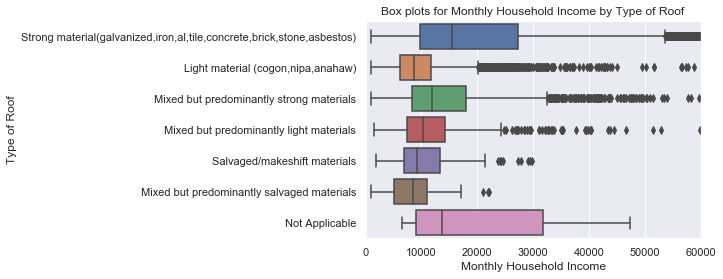

In [43]:
df5_tr = df5[['Type of Roof', 'Monthly Household Income']]
test13 = sns.boxplot(y ='Type of Roof', x = 'Monthly Household Income', data = df5_tr)
test13.set_xlim(0,60000)
plt.title('Box plots for Monthly Household Income by Type of Roof')
plt.show()

The Box plots above, apart from the topmost and bottommost group, have significant overlap with each other. Also, the topmost and bottommost group have significant overlap with each other as well. The presented categorical variable seems to be not as good of a predictor.

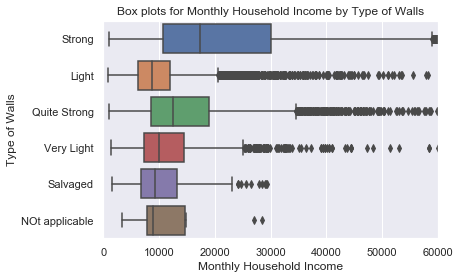

In [44]:
df5_tw = df5[['Type of Walls', 'Monthly Household Income']]
test14 = sns.boxplot(y ='Type of Walls', x = 'Monthly Household Income', data = df5_tw)
test14.set_xlim(0,60000)
plt.title('Box plots for Monthly Household Income by Type of Walls')
plt.show()

The Box plots above, apart from the 'Strong' group, have significant overlap with each other so the categorical variable seems to be not as good of a predictor.

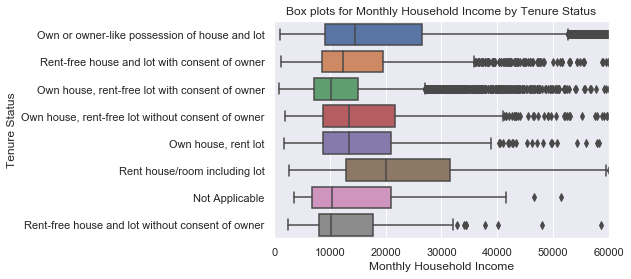

In [45]:
df5_ts = df5[['Tenure Status', 'Monthly Household Income']]
test15 = sns.boxplot(y ='Tenure Status', x = 'Monthly Household Income', data = df5_ts)
test15.set_xlim(0,60000)
plt.title('Box plots for Monthly Household Income by Tenure Status')
plt.show()

The Box plots above have multiple instances of significant overlap with each other so the categorical variable seems to not fit as a good predictor.

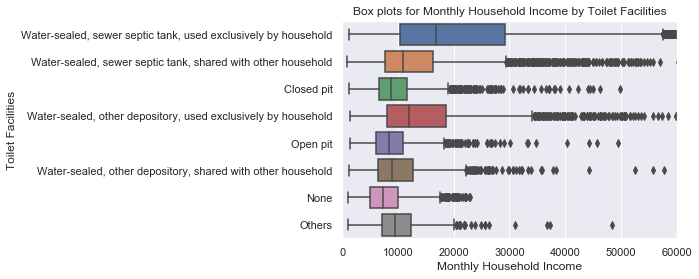

In [46]:
df5_tf = df5[['Toilet Facilities', 'Monthly Household Income']]
test16 = sns.boxplot(y ='Toilet Facilities', x = 'Monthly Household Income', data = df5_tf)
test16.set_xlim(0,60000)
plt.title('Box plots for Monthly Household Income by Toilet Facilities')
plt.show()

The Box plots above have multiple instances of significant overlap with each other so the categorical variable seems to not fit as a good predictor.

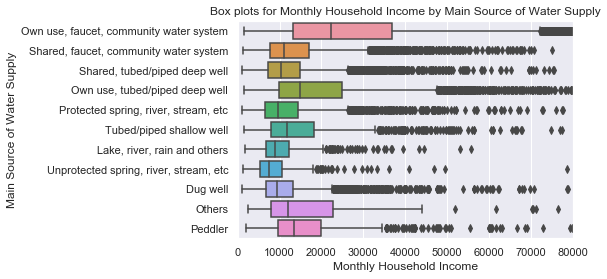

In [47]:
df5_msw = df5[['Main Source of Water Supply', 'Monthly Household Income']]
test17 = sns.boxplot(y ='Main Source of Water Supply', x = 'Monthly Household Income', data = df5_msw)
test17.set_xlim(0,80000)
plt.title('Box plots for Monthly Household Income by Main Source of Water Supply')
plt.show()

The Box plots above have multiple instances of significant overlap with each other so the categorical variable seems to not fit as a good predictor.

<a id='conclusion'></a>
## Conclusion

After assessing different variables, the following were selected to be predictor variables for Monthly Household Income:

Continuous numerical variables:
<ul>
    <li>Communication Expenditure</li>
    <li>Housing and water Expenditure</li>
    <li>Miscellaneous Goods and Services Expenditure</li>
    <li>Total Food Expenditure</li>
    <li>Transportation Expenditure</li>
    <li>Clothing, Footwear and Other Wear Expenditure</li>
    <li>Total Household Utility Items</li>
</ul>

Categorical variables:
<ul>
    <li>Household Head Completed Grade Group</li>
    <li>Agricultural Household Indicator</li>
    <li>Electricity</li>
</ul>

The categorical variable _Household Head Occupation_ should also be recommended for further study.